# A/B Testing Marketing Promotions

Which promotion was the most effective?

**Scenario:**

A fast food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks

**The description of the data set:**
Our data set consists of 548 entries including:
- MarketId: an inhouse tag used to describe market types, we won't be using it
- AgeOfStores: Age of store in years (1–28). The mean age of a store is 8.5 years.
- LocationID: Unique identifier for store location. Each location is identified by a number. The total number of stores is 137.
- Promotion: One of three promotions that were tested (1, 2, 3). We don’t really know the specifics of each promotion.
- Sales in Thousands: Sales amount for a specific LocationID, Promotion and week. The mean amount of sales are 53.5 thousand dollars.
- Market size: there are three types of market size: small, medium and large.
- Week: One of four weeks when the promotions were run (1–4).

### Data Import and Pre-processing

In [3]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
sns.set_style('whitegrid')
import matplotlib.pyplot as plt        #For plotting graphs
%matplotlib inline                    
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
import gc
import datetime

In [7]:
# Loading Data
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv"
df = pd.read_csv(file_name)
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [11]:
#To show total rows and columns
df.shape

(548, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [17]:
# Check for null values
print(df.isnull().sum())


MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64


In [19]:
# To check any duplicate rows
df.duplicated().sum()

0

In [27]:
# unique count on each column
df.nunique()

MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64

In [35]:
df.Promotion.value_counts()

Promotion
3    188
2    188
1    172
Name: count, dtype: int64

### Basic Statistical Details 

In [39]:
#numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MarketID,548.0,5.715328,2.877001,1.00,3.000,6.0,8.0000,10.00
LocationID,548.0,479.656934,287.973679,1.00,216.000,504.0,708.0000,920.00
AgeOfStore,548.0,8.503650,6.638345,1.00,4.000,7.0,12.0000,28.00
Promotion,548.0,2.029197,0.810729,1.00,1.000,2.0,3.0000,3.00
week,548.0,2.500000,1.119055,1.00,1.750,2.5,3.2500,4.00
SalesInThousands,548.0,53.466204,16.755216,17.34,42.545,50.2,60.4775,99.65


In [44]:
# String Columns
str_cols= df.select_dtypes("object").columns
df[str_cols].describe().T

,count,unique,top,freq
MarketSize,548,3,Medium,320


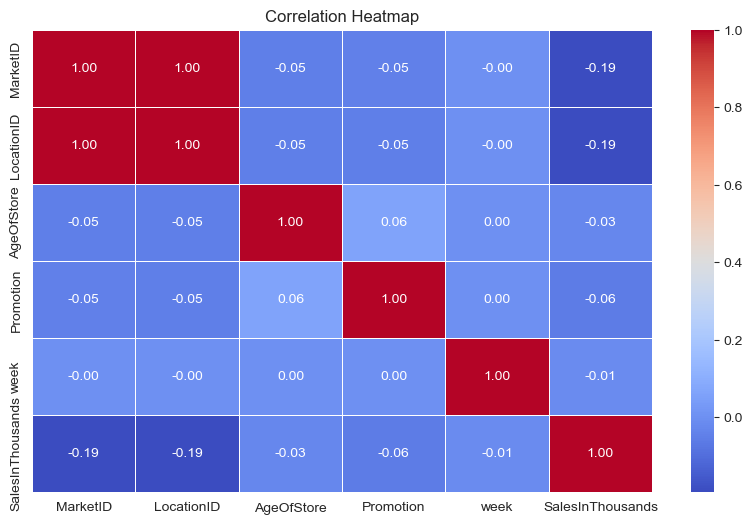

In [53]:
# Calculate correlation matrix
correlation_matrix = df.drop('MarketSize',axis=1).corr()
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#### Key Findings from the Correlation Heatmap


#### Strong Positive Correlations

- The strongest positive correlation (1.0) is observed between the variables "MarketID" and "LocationID", indicating that these two variables are perfectly correlated.

#### Moderate Negative Correlations

- There are moderate negative correlations (-0.19) between "SalesInThousands" and both "MarketID" and "LocationID", indicating an inverse relationship between these variables.
- A similar moderate negative correlation (-0.19) is observed between "SalesInThousands" and "AgeOfStore".

#### Weak Correlations

- The variable "Promotion" has weak correlations (around 0.06 or -0.06) with most other variables, suggesting that it is not strongly associated with the other factors.
- The variable "week" has a weak negative correlation (-0.01) with "SalesInThousands", implying that the sales figures do not vary significantly with the week.


## EDA and Visualizations

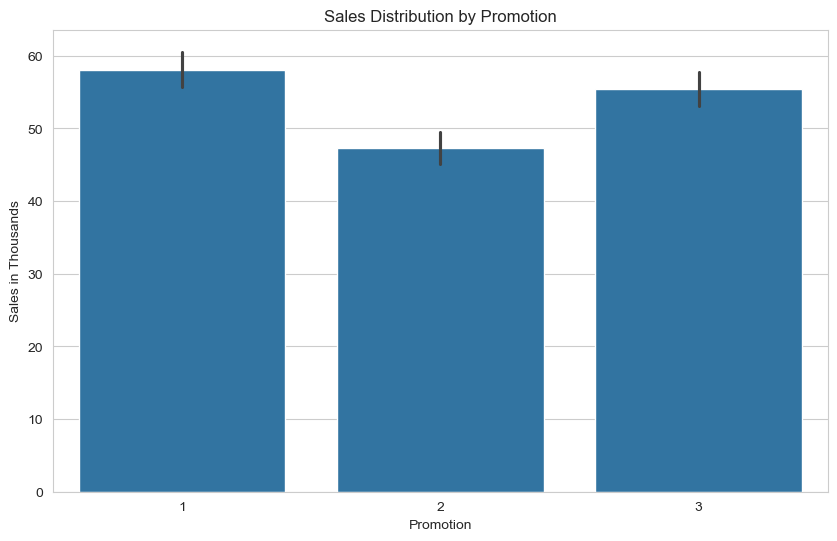

In [60]:
# Barplot of Sales by Promotion
plt.figure(figsize=(10, 6))
sns.barplot(x='Promotion', y='SalesInThousands', data=df)
plt.title('Sales Distribution by Promotion')
plt.ylabel('Sales in Thousands')
plt.show()

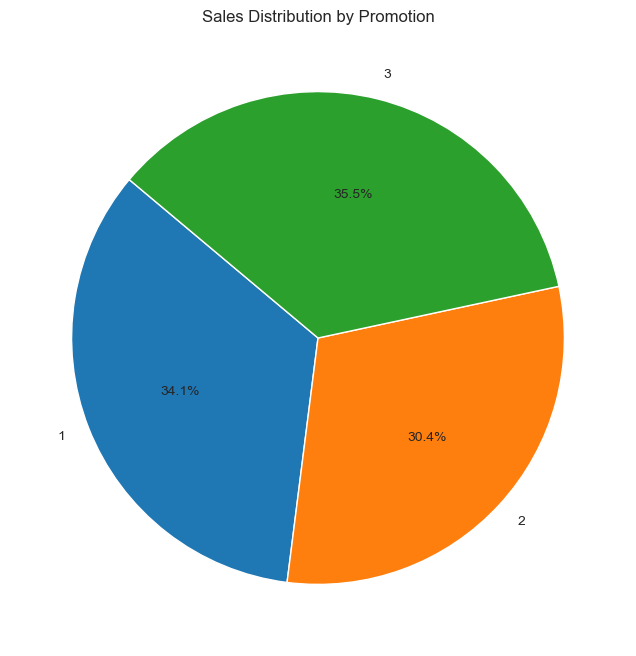

In [66]:
import matplotlib.pyplot as plt

# Calculate total sales by promotion
sales_by_promotion = df.groupby('Promotion')['SalesInThousands'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_promotion, labels=sales_by_promotion.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Promotion')
plt.show()

#### Key Findings from the Sales Distribution by Promotion 

1. **Uneven Distribution:** The sales are not evenly distributed across the three promotions.

2. **Promotion 3 Dominance:** Promotion 3 has the highest share of sales, accounting for 35.5% of the total sales.

3. **Promotion 1 and 2 Similarity:** Promotion 1 and 2 have similar sales shares, with 34.1% and 30.4%, respectively.

#### Possible Interpretations:

**Promotion 3 Effectiveness:** This promotion might be more attractive to customers, leading to higher sales.
**Promotion 1 and 2 Comparability:** These promotions could be similar in terms of offerings and benefits, resulting in similar sales performance.

In [81]:
# Now let's view the promotions for each market size
df1=df.groupby(['Promotion', 'MarketSize'])['MarketID'].count().reset_index(name='Count')
df1

,Promotion,MarketSize,Count
0,1,Large,56
1,1,Medium,96
2,1,Small,20
3,2,Large,64
4,2,Medium,108
5,2,Small,16
6,3,Large,48
7,3,Medium,116
8,3,Small,24


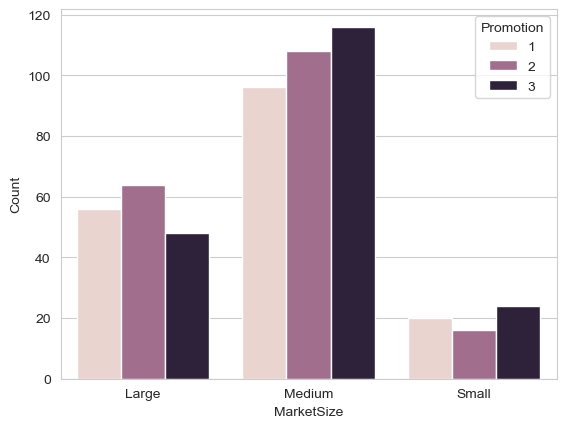

In [85]:
sns.barplot(data=df1, x='MarketSize',y='Count',hue='Promotion')
plt.savefig('1')
plt.show()

**Large Market Size:**
Promotion 1 and Promotion 2 have similar contributions to sales, with Promotion 2 being slightly higher.
Promotion 3 has a relatively low impact on sales in large markets.

**Medium Market Size:**
Promotion 3 dominates the sales, accounting for a significantly higher proportion compared to other promotion types.
Promotion 1 and Promotion 2 have smaller, but still notable, contributions to sales in medium-sized markets.

**Small Market Size:**
Promotion 1 and Promotion 3 have relatively equal shares of sales in small markets.
Promotion 2 has a minimal impact on sales in small markets.

# Performing A/B Testing

In [115]:
means = df.groupby('Promotion')['SalesInThousands'].mean()
stds = df.groupby('Promotion')['SalesInThousands'].std()
ns = df.groupby('Promotion')['SalesInThousands'].count()

print("Means:\n", means)
print("\n\nStandard Deviations:\n", stds)
print("\n\nCounts:\n", ns)


Means:
 Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64


Standard Deviations:
 Promotion
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64


Counts:
 Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64


.
.
.

**T-Value**

The t-value measures the degree of difference relative to the variation in our data groups. Large t-values indicate a higher degree of difference between the grups. 

**P-Value**

P-value measures the probability that the results would occur by random chance. Therefore the smaller the p-value is, the more statistically significant difference there will be between the two groups

### Comparing Promotion 1 vs Promotion 2 in an A/B Test

In [104]:
# Computing the t and p values using scipy 
from scipy import stats

t, p = stats.ttest_ind(df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
                       df.loc[df['Promotion'] == 2, 'SalesInThousands'].values, 
                       equal_var=False)
print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 6.42752867090748
p-value = 4.2903687179871785e-10


#### Interpretation of t-test Results:

- **t-value**: 6.43  
  This indicates a large difference between the means of Promotion 1 and Promotion 2, relative to the variability within each promotion. A higher t-value suggests a larger difference in sales between the two promotions.

- **p-value**: 4.29e-10  
  The p-value is extremely small (well below the common significance level of 0.05), indicating that the difference in sales between Promotion 1 and Promotion 2 is **statistically significant**.  
  This means we can  **reject the null hypothesis**, suggesting that there is a significant difference in sales between the two promotions.

#### Mean of Sales:

- **Promotion 1**: 58.10 (thousand dollars)
- **Promotion 2**: 47.33 (thousand dollars)
- **Promotion 3**: 55.36 (thousand dollars)

#### Conclusion:
Given the high t-value and the very small p-value, **Promotion 1** ( high mean)  has a significantly higher impact on sales than **Promotion 2**. 


### Comparing Promotion 1 vs Promotion 3 in an A/B Test

In [119]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values, 
    equal_var=False)

print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 1.5560224307758634
p-value = 0.12059147742229478


#### Interpretation of Results:

- **t-value**: 1.56  
  This indicates the difference between the means of Promotion 1 and Promotion 3, relative to the variability within each promotion. A higher t-value suggests a larger difference relative to variability, but the p-value gives more actionable insight.

- **p-value**: 0.12  
  The p-value of 0.12 is greater than the common significance level of 0.05, which means the difference in sales between Promotion 1 and Promotion 3 is not statistically significant.  
  This suggests that we do not have enough evidence to conclude that the sales for Promotion 1 and Promotion 3 are different in a statistically meaningful wa#y.

### Conclusion:
Based on these results, we would fail to reject the null hypothesis, meaning there is no strong statistical evidence to suggest that the difference in sales between Promotion 1 and Promotion 3 is significant level.
ce.



---------------------------------------------------------------------------------------------------------------------------------